# Hackathon

### imports

In [190]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline              
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
# Million Tonnes of Oil Equivalent

### Production monde

In [206]:
df = pd.read_csv('Total_energy_production.csv', header=2)

def clean_data(df):
    df = df.rename(columns={'2000 - 2018 (%/year) ': 'Evolution'})
    #df.nlargest(10, df['Evolution'])
    df.sort_values(by ='Evolution' , ascending=False)
    df = df.drop_duplicates()
    df['Countries']=pd.to_numeric(df.iloc[:,0], errors='ignore')
    df.drop(df.filter(regex="Unnamed"),axis=1, inplace=True)
    df=df.set_index('Countries')
    return df
df_clean = clean_data(df)

In [207]:
df_clean.head(20)

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2017 - 2018 (%),Evolution
Countries,,,,,,,,,,,,,,,,,,,,,
World,8796.0,8813.0,8866.0,8902.0,9034.0,9251.0,9479.0,9602.0,9718.0,9727.0,...,13119.0,13298.0,13486.0,13716.0,13802.0,13754.0,14068.0,14468.0,"2,8","2,1"
OECD,3446.0,3476.0,3501.0,3499.0,3617.0,3679.0,3778.0,3809.0,3823.0,3799.0,...,3876.0,3906.0,3997.0,4159.0,4180.0,4080.0,4207.0,4408.0,"4,8","0,8"
G7,2535.0,2533.0,2546.0,2530.0,2636.0,2666.0,2711.0,2717.0,2736.0,2716.0,...,2676.0,2686.0,2757.0,2915.0,2945.0,2833.0,2953.0,3159.0,"7,0","0,8"
BRICS,2676.0,2619.0,2561.0,2522.0,2528.0,2604.0,2642.0,2626.0,2639.0,2666.0,...,4616.0,4655.0,4735.0,4790.0,4828.0,4742.0,4901.0,5071.0,"3,5","3,5"
Europe,1133.0,1133.0,1137.0,1148.0,1176.0,1207.0,1263.0,1259.0,1227.0,1228.0,...,1079.0,1073.0,1062.0,1044.0,1047.0,1044.0,1047.0,1043.0,"-0,4","-1,0"
European Union,955.0,945.0,933.0,937.0,953.0,968.0,1000.0,988.0,960.0,961.0,...,812.0,803.0,798.0,780.0,773.0,761.0,758.0,753.0,"-0,6","-1,3"
Belgium,13.0,13.0,13.0,12.0,12.0,12.0,12.0,13.0,13.0,14.0,...,16.0,14.0,15.0,13.0,11.0,15.0,15.0,12.0,"-23,2","-0,9"
Czech Republic,41.0,39.0,37.0,36.0,34.0,33.0,33.0,34.0,32.0,29.0,...,33.0,33.0,31.0,30.0,29.0,27.0,28.0,28.0,"0,2","-0,6"
France,112.0,119.0,120.0,126.0,124.0,128.0,132.0,129.0,125.0,127.0,...,136.0,135.0,137.0,138.0,139.0,131.0,130.0,135.0,"4,2","0,2"


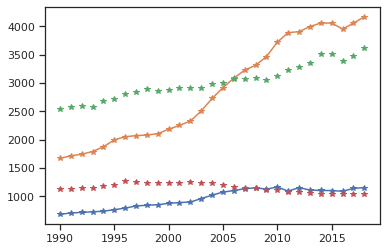

In [208]:
a=np.array(df_clean.loc[['Africa','Asia','America','Europe', 'World']])
n=len(a[0,:-2])
b=[k for k in range(1990,n+1990)]
plt.plot(b,a[0,:-2],'-*',b,a[1,:-2],'-*',b,a[2,:-2],'*',b,a[3,:-2],'*')